In [643]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import os
import time
import warnings
warnings.filterwarnings('ignore')

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [644]:
#####################################
# Import the train and test datasets#
#####################################

empty_set = ['' for i in range(54)]
total_features = ['Page Likes', 'Page Checkins', 'Page Talking About', 'Page Category', 
            'Min CC1', 'Max CC1', 'Average CC1', 'Median CC1', 'Standard Deviation CC1', 
            'Min CC2', 'Max CC2', 'Average CC2', 'Median CC2', 'Standard Deviation CC2', 
            'Min CC3', 'Max CC3', 'Average CC3', 'Median CC3', 'Standard Deviation CC3', 
            'Min CC4', 'Max CC4', 'Average CC4', 'Median CC4', 'Standard Deviation CC4', 
            'Min CC5', 'Max CC5', 'Average CC5', 'Median CC5', 'Standard Deviation CC5', 
            'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 
            'Base Time', 'Post Length', 'Post Share Count', 'Post Promotion Status', 'H Local', 
            'Sunday_Wk1', 'Monday_WK1', 'Tuesday_WK1', 'Wednesday_WK1', 'Thursday_WK1', 'Friday_WK1', 'Saturday_WK1', 
            'Sunday_WK2', 'Monday_WK2', 'Tuesday_WK2', 'Wednesday_WK2', 'Thursday_WK2', 'Friday_WK2', 'Saturday_WK2',
            'Number of Comments in the Next H Hours']

non_categorical_features = ['Page Likes', 'Page Checkins', 'Page Talking About', 'Page Category', 
            'Min CC1', 'Max CC1', 'Average CC1', 'Median CC1', 'Standard Deviation CC1', 
            'Min CC2', 'Max CC2', 'Average CC2', 'Median CC2', 'Standard Deviation CC2', 
            'Min CC3', 'Max CC3', 'Average CC3', 'Median CC3', 'Standard Deviation CC3', 
            'Min CC4', 'Max CC4', 'Average CC4', 'Median CC4', 'Standard Deviation CC4', 
            'Min CC5', 'Max CC5', 'Average CC5', 'Median CC5', 'Standard Deviation CC5', 
            'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 
            'Base Time', 'Post Length', 'Post Share Count', 'Post Promotion Status', 'H Local']

Label_Features = ['Number of Comments in the Next H Hours']

num_attribs = list(non_categorical_features)

categorical_features = ['Sunday_Wk1', 'Monday_WK1', 'Tuesday_WK1', 'Wednesday_WK1', 'Thursday_WK1', 'Friday_WK1', 'Saturday_WK1', 
            'Sunday_WK2', 'Monday_WK2', 'Tuesday_WK2', 'Wednesday_WK2', 'Thursday_WK2', 'Friday_WK2', 'Saturday_WK2']

cat_attribs = list(categorical_features)

#IMPORT THE DATASET- 5 training sets and 5 test sets

train_data_1 = pd.read_csv("Machine Learning Project/Training/Features_Variant_1.csv", names = total_features)

test_data_1 = pd.read_csv("Machine Learning Project/Testing/TestSet/Test_Case_1.csv", names = total_features)

train_data_2 = pd.read_csv("Machine Learning Project/Training/Features_Variant_2.csv", names = total_features)

test_data_2 = pd.read_csv("Machine Learning Project/Testing/TestSet/Test_Case_2.csv", names = total_features)

train_data_3 = pd.read_csv("Machine Learning Project/Training/Features_Variant_3.csv", names = total_features)

test_data_3 = pd.read_csv("Machine Learning Project/Testing/TestSet/Test_Case_3.csv", names = total_features)

train_data_4 = pd.read_csv("Machine Learning Project/Training/Features_Variant_4.csv", names = total_features)

test_data_4 = pd.read_csv("Machine Learning Project/Testing/TestSet/Test_Case_4.csv", names = total_features)

train_data_5 = pd.read_csv("Machine Learning Project/Training/Features_Variant_5.csv", names = total_features)

test_data_5 = pd.read_csv("Machine Learning Project/Testing/TestSet/Test_Case_5.csv", names = total_features)

In [645]:
# TRAIN LABEL 1
Training_Data_1_Features = train_data_1.drop('Number of Comments in the Next H Hours', axis=1)
Training_Data_1_Labels = train_data_1['Number of Comments in the Next H Hours']

# TRAIN LABELS 2

Training_Data_2_Features = train_data_2.drop('Number of Comments in the Next H Hours', axis=1)
Training_Data_2_Labels = train_data_2['Number of Comments in the Next H Hours']

# TRAIN LABELS 3

Training_Data_3_Features = train_data_3.drop('Number of Comments in the Next H Hours', axis=1)
Training_Data_3_Labels = train_data_3['Number of Comments in the Next H Hours']

# TRAIN LABELS 4

Training_Data_4_Features = train_data_4.drop('Number of Comments in the Next H Hours', axis=1)
Training_Data_4_Labels = train_data_4['Number of Comments in the Next H Hours']

# TRAIN LABELS 5

Training_Data_5_Features = train_data_5.drop('Number of Comments in the Next H Hours', axis=1)
Training_Data_5_Labels = train_data_5['Number of Comments in the Next H Hours']

In [646]:
##########################################
# Drop the target labels from the test set
##########################################

# TEST LABELS 1

Test_Data_1_Features = test_data_1.drop('Number of Comments in the Next H Hours', axis=1)
Test_Data_1_Labels = test_data_1['Number of Comments in the Next H Hours']

# TEST LABELS 2

Test_Data_2_Features = test_data_2.drop('Number of Comments in the Next H Hours', axis=1)
Test_Data_2_Labels = test_data_2['Number of Comments in the Next H Hours']

# TEST LABELS 3

Test_Data_3_Features = test_data_3.drop('Number of Comments in the Next H Hours', axis=1)
Test_Data_3_Labels = test_data_3['Number of Comments in the Next H Hours']

# TEST LABELS 4

Test_Data_4_Features = test_data_4.drop('Number of Comments in the Next H Hours', axis=1)
Test_Data_4_Labels = test_data_4['Number of Comments in the Next H Hours']

# TEST LABELS 5

Test_Data_5_Features = test_data_5.drop('Number of Comments in the Next H Hours', axis=1)
Test_Data_5_Labels = test_data_5['Number of Comments in the Next H Hours']

In [647]:
## Body for Data Frame Selector
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs))
    ])


from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
            ("num_pipeline", num_pipeline),
            ("cat_pipeline", cat_pipeline)
    
    ])


In [648]:
# Num pipeline for the labels.
from sklearn.preprocessing import StandardScaler

number_pipeline = StandardScaler()

In [649]:
# Now run this pipeline on training and test sets. transform the training data and test data's features and labels

#SET 1
Training_Data_1_Features = full_pipeline.fit_transform(Training_Data_1_Features)
Training_Data_1_Labels = number_pipeline.fit_transform(Training_Data_1_Labels.reshape(-1,1))

Test_Data_1_Features = full_pipeline.transform(Test_Data_1_Features)
Test_Data_1_Labels = number_pipeline.transform(Test_Data_1_Labels.reshape(-1,1))

#SET 2
Training_Data_2_Features = full_pipeline.fit_transform(Training_Data_2_Features)
Training_Data_2_Labels = number_pipeline.fit_transform(Training_Data_2_Labels.reshape(-1,1))

Test_Data_2_Features = full_pipeline.transform(Test_Data_2_Features)
Test_Data_2_Labels = number_pipeline.transform(Test_Data_2_Labels.reshape(-1,1))

#SET 3
Training_Data_3_Features = full_pipeline.fit_transform(Training_Data_3_Features)
Training_Data_3_Labels = number_pipeline.fit_transform(Training_Data_3_Labels.reshape(-1,1))

Test_Data_3_Features = full_pipeline.transform(Test_Data_3_Features)
Test_Data_3_Labels = number_pipeline.transform(Test_Data_3_Labels.reshape(-1,1))

#SET 4
Training_Data_4_Features = full_pipeline.fit_transform(Training_Data_4_Features)
Training_Data_4_Labels = number_pipeline.fit_transform(Training_Data_4_Labels.reshape(-1,1))

Test_Data_4_Features = full_pipeline.transform(Test_Data_4_Features)
Test_Data_4_Labels = number_pipeline.transform(Test_Data_4_Labels.reshape(-1,1))

#SET 5

Training_Data_5_Features = full_pipeline.fit_transform(Training_Data_5_Features)
Training_Data_5_Labels = number_pipeline.fit_transform(Training_Data_5_Labels.reshape(-1,1))

Test_Data_5_Features = full_pipeline.transform(Test_Data_5_Features)
Test_Data_5_Labels = number_pipeline.transform(Test_Data_5_Labels.reshape(-1,1))

In [650]:
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [651]:
from sklearn.ensemble import RandomForestRegressor

Random_Forest_Regressor = RandomForestRegressor(random_state=42)

n_estimators = [10, 50, 100]
max_features = [0.1, 0.5]
max_depth = [2, 5, 7] 
#oob_score = [True, False]
min_samples_split = [0.1, 0.5]
min_samples_leaf = [0.1, 0.5]
max_leaf_nodes = [2, 7, 10]

Param = {'n_estimators' : n_estimators, 'max_features' : max_features, 'max_depth': max_depth,
         'min_samples_split' : min_samples_split, 'min_samples_leaf' : min_samples_leaf,
         'max_leaf_nodes' : max_leaf_nodes}


Rndom_Search_RForest = RandomizedSearchCV(Random_Forest_Regressor, Param, cv = 4, scoring='neg_mean_absolute_error', 
                                  refit = True, n_jobs = -1, verbose = 2)

In [652]:
#fit the first training set.

Model_1 = Rndom_Search_RForest.fit(Training_Data_1_Features, Training_Data_1_Labels)

Model_1_best_params_ = Rndom_Search_RForest.best_params_

Model_1_best_estimators_ = Rndom_Search_RForest.best_estimator_

print(Model_1_best_params_)

print(Model_1_best_estimators_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   12.2s finished


{'n_estimators': 50, 'min_samples_split': 0.1, 'min_samples_leaf': 0.1, 'max_leaf_nodes': 10, 'max_features': 0.5, 'max_depth': 5}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=0.5, max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.1,
           min_samples_split=0.1, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)


In [653]:
#Capture the time involved in predicting the first training set

StartTime = time.time()
train_pred_Model_1 = Model_1_best_estimators_.predict(Training_Data_1_Features)
EndTime = time.time()

print("Processing time for 1st model took {:.1f}s.".format(EndTime - StartTime))

Processing time for 1st model took 0.1s.


In [654]:
# Hits @ 10. 1.

Training_Data_1_Labels_Flatten = np.array(Training_Data_1_Labels).flatten()

Model_1_Index = np.array([i for i in range(len(Training_Data_1_Labels))])

top10_Index_Predicted = pd.DataFrame(data = {'Indexes' : Model_1_Index, 'Predicted_Values' : train_pred_Model_1}).sort_values(by=['Predicted_Values'])['Indexes'][0:10,]

top10_Index_Actuals = pd.DataFrame(data = {'Indexes' : Model_1_Index, 'Actual_Values' : Training_Data_1_Labels_Flatten}).sort_values(by=['Actual_Values'])['Indexes'][0:10,]
    
True_Hits1 = np.intersect1d(top10_Index_Predicted,top10_Index_Actuals).shape[0]

True_Hits1

0

In [655]:
# Now compute the ROC_AUC Score
from sklearn.metrics import roc_auc_score

top10_Index_Predicted = np.sort(train_pred_Model_1)[-10:]
top10_Index_Actuals = np.sort(Training_Data_1_Labels_Flatten)[-10:]

Predictions_Binary = (train_pred_Model_1 >= top10_Index_Predicted[0])
Predictions_Binary = Predictions_Binary * 1

Actuals_Binary = (Training_Data_1_Labels_Flatten >= top10_Index_Actuals[0])
Actuals_Binary = Actuals_Binary * 1

roc_auc_score(Actuals_Binary, Predictions_Binary)

0.7382019590121889

In [656]:
#Compute the Mean absolute error
from sklearn.metrics import mean_absolute_error

MAE_Model_1 = mean_absolute_error(Training_Data_1_Labels_Flatten, train_pred_Model_1)
MAE_Model_1

0.2238965191414817

In [657]:
# Now compute the performances on the Test Set. Hits@10, AUC and MAE

StartTime = time.time()
test_pred_Model_1 = Model_1_best_estimators_.predict(Test_Data_1_Features)
EndTime = time.time()

Model1_Time = round(EndTime-StartTime, 4)
print("Processing time for testing 1st model took {:.1f}s.".format(EndTime - StartTime))

Processing time for testing 1st model took 0.0s.


In [658]:
# Hits @ 10. 1.for 1st test set

Test_Data_1_Labels_Flatten = np.array(Test_Data_1_Labels).flatten()

Model_1_Index = np.array([i for i in range(len(Test_Data_1_Labels))])

top10_Index_Predicted = pd.DataFrame(data = {'Indexes' : Model_1_Index, 'Predicted_Values' : test_pred_Model_1}).sort_values(by=['Predicted_Values'])['Indexes'][0:10,]

top10_Index_Actuals = pd.DataFrame(data = {'Indexes' : Model_1_Index, 'Actual_Values' : Test_Data_1_Labels_Flatten}).sort_values(by=['Actual_Values'])['Indexes'][0:10,]
    
True_Hits1 = np.intersect1d(top10_Index_Predicted,top10_Index_Actuals)

True_Hits1 = len(True_Hits1)

True_Hits1

4

In [659]:
# Now compute the ROC_AUC Score
from sklearn.metrics import roc_auc_score

top10_Index_Predicted = np.sort(test_pred_Model_1)[-10:]
top10_Index_Actuals = np.sort(Test_Data_1_Labels_Flatten)[-10:]

Predictions_Binary = (test_pred_Model_1 >= top10_Index_Predicted[0])
Predictions_Binary = Predictions_Binary * 1

Actuals_Binary = (Test_Data_1_Labels_Flatten >= top10_Index_Actuals[0])
Actuals_Binary = Actuals_Binary * 1

ROC_MODEL1 = roc_auc_score(Actuals_Binary, Predictions_Binary)
ROC_MODEL1

0.8166666666666667

In [660]:
#Compute the Mean absolute error for test set
from sklearn.metrics import mean_absolute_error

MAE_Model_1 = mean_absolute_error(Test_Data_1_Labels_Flatten, test_pred_Model_1)
MAE_Model_1

0.9112083542126751

In [661]:
# Now Fit on the 2nd Data Train

Model_2 = Rndom_Search_RForest.fit(Training_Data_2_Features, Training_Data_2_Labels)

Model_2_best_params_ = Rndom_Search_RForest.best_params_

Model_2_best_estimators_ = Rndom_Search_RForest.best_estimator_

print(Model_2_best_params_)

print(Model_2_best_estimators_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.1min finished


{'n_estimators': 100, 'min_samples_split': 0.1, 'min_samples_leaf': 0.1, 'max_leaf_nodes': 10, 'max_features': 0.5, 'max_depth': 5}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=0.5, max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.1,
           min_samples_split=0.1, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)


In [662]:
#Capture the time involved in predicting the second training set

StartTime = time.time()
train_pred_Model_2 = Model_2_best_estimators_.predict(Training_Data_2_Features)
EndTime = time.time()

print("Processing time for 2nd model took {:.1f}s.".format(EndTime - StartTime))

Processing time for 2nd model took 0.2s.


In [663]:
# Hits @ 10. 2.

Training_Data_2_Labels_Flatten = np.array(Training_Data_2_Labels).flatten()

Model_2_Index = np.array([i for i in range(len(Training_Data_2_Labels))])

top10_Index_Predicted = pd.DataFrame(data = {'Indexes' : Model_2_Index, 'Predicted_Values' : train_pred_Model_2}).sort_values(by=['Predicted_Values'])['Indexes'][0:10,]

top10_Index_Actuals = pd.DataFrame(data = {'Indexes' : Model_2_Index, 'Actual_Values' : Training_Data_2_Labels_Flatten}).sort_values(by=['Actual_Values'])['Indexes'][0:10,]
    
True_Hits2 = np.intersect1d(top10_Index_Predicted,top10_Index_Actuals).shape[0]

True_Hits2

0

In [664]:
# Now compute the ROC_AUC Score for second set
from sklearn.metrics import roc_auc_score

top10_Index_Predicted = np.sort(train_pred_Model_2)[-10:]
top10_Index_Actuals = np.sort(Training_Data_2_Labels_Flatten)[-10:]

Predictions_Binary = (train_pred_Model_2 >= top10_Index_Predicted[0])
Predictions_Binary = Predictions_Binary * 1

Actuals_Binary = (Training_Data_2_Labels_Flatten >= top10_Index_Actuals[0])
Actuals_Binary = Actuals_Binary * 1

roc_auc_score(Actuals_Binary, Predictions_Binary)

0.7894590538978131

In [665]:
#Compute the Mean absolute error
from sklearn.metrics import mean_absolute_error

MAE_Model_2 = mean_absolute_error(Training_Data_2_Labels_Flatten, train_pred_Model_2)
MAE_Model_2

0.21770199781421637

In [666]:
# Now compute the performances on the 2nd Test Set. Hits@10, AUC and MAE

StartTime = time.time()
test_pred_Model_2 = Model_2_best_estimators_.predict(Test_Data_2_Features)
EndTime = time.time()

Model2_Time = round(EndTime-StartTime, 4)

print("Processing time for testing 2nd model took {:.1f}s.".format(EndTime - StartTime))

# Hits @ 10..for 2nd test set

Test_Data_2_Labels_Flatten = np.array(Test_Data_2_Labels).flatten()

Model_2_Index = np.array([i for i in range(len(Test_Data_2_Labels))])

top10_Index_Predicted = pd.DataFrame(data = {'Indexes' : Model_2_Index, 'Predicted_Values' : test_pred_Model_2}).sort_values(by=['Predicted_Values'])['Indexes'][0:10,]

top10_Index_Actuals = pd.DataFrame(data = {'Indexes' : Model_2_Index, 'Actual_Values' : Test_Data_2_Labels_Flatten}).sort_values(by=['Actual_Values'])['Indexes'][0:10,]
    
True_Hits2 = np.intersect1d(top10_Index_Predicted,top10_Index_Actuals)

True_Hits2 = len(True_Hits2)
print (True_Hits2)

# Now compute the ROC_AUC Score
from sklearn.metrics import roc_auc_score

top10_Index_Predicted = np.sort(test_pred_Model_2)[-10:]
top10_Index_Actuals = np.sort(Test_Data_2_Labels_Flatten)[-10:]

Predictions_Binary = (test_pred_Model_2 >= top10_Index_Predicted[0])
Predictions_Binary = Predictions_Binary * 1

Actuals_Binary = (Test_Data_2_Labels_Flatten >= top10_Index_Actuals[0])
Actuals_Binary = Actuals_Binary * 1

ROC_MODEL2 = roc_auc_score(Actuals_Binary, Predictions_Binary)

print(ROC_MODEL2)
#Compute the Mean absolute error for test set
from sklearn.metrics import mean_absolute_error

MAE_Model_2 = mean_absolute_error(Test_Data_2_Labels_Flatten, test_pred_Model_2)
print (MAE_Model_2)

Processing time for testing 2nd model took 0.0s.
2
0.6666666666666666
0.7029322390115705


In [667]:
# Run the Third Model

Model_3 = Rndom_Search_RForest.fit(Training_Data_3_Features, Training_Data_3_Labels)

Model_3_best_params_ = Rndom_Search_RForest.best_params_

Model_3_best_estimators_ = Rndom_Search_RForest.best_estimator_

print(Model_3_best_params_)

print(Model_3_best_estimators_)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.0min finished


{'n_estimators': 100, 'min_samples_split': 0.5, 'min_samples_leaf': 0.1, 'max_leaf_nodes': 10, 'max_features': 0.5, 'max_depth': 2}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features=0.5, max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.1,
           min_samples_split=0.5, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)


In [668]:
#Capture the time involved in predicting the third training set

StartTime = time.time()
train_pred_Model_3 = Model_3_best_estimators_.predict(Training_Data_3_Features)
EndTime = time.time()

print("Processing time for 3rd model took {:.1f}s.".format(EndTime - StartTime))

# Hits @ 10. 1.

Training_Data_3_Labels_Flatten = np.array(Training_Data_3_Labels).flatten()

Model_3_Index = np.array([i for i in range(len(Training_Data_3_Labels))])

top10_Index_Predicted = pd.DataFrame(data = {'Indexes' : Model_3_Index, 'Predicted_Values' : train_pred_Model_3}).sort_values(by=['Predicted_Values'])['Indexes'][0:10,]

top10_Index_Actuals = pd.DataFrame(data = {'Indexes' : Model_3_Index, 'Actual_Values' : Training_Data_3_Labels_Flatten}).sort_values(by=['Actual_Values'])['Indexes'][0:10,]
    
True_Hits3 = np.intersect1d(top10_Index_Predicted,top10_Index_Actuals).shape[0]

print("TRUE HITS for 3rd model is", True_Hits3)


# Now compute the ROC_AUC Score for the third model

from sklearn.metrics import roc_auc_score

top10_Index_Predicted = np.sort(train_pred_Model_3)[-10:]
top10_Index_Actuals = np.sort(Training_Data_3_Labels_Flatten)[-10:]

Predictions_Binary = (train_pred_Model_3 >= top10_Index_Predicted[0])
Predictions_Binary = Predictions_Binary * 1

Actuals_Binary = (Training_Data_3_Labels_Flatten >= top10_Index_Actuals[0])
Actuals_Binary = Actuals_Binary * 1

print("ROC AUC Score for 3rd model is ", roc_auc_score(Actuals_Binary, Predictions_Binary))

#Compute the Mean absolute error for the third model
from sklearn.metrics import mean_absolute_error

MAE_Model_3 = mean_absolute_error(Training_Data_3_Labels_Flatten, train_pred_Model_3)
print("MAE for 3rd model is " ,MAE_Model_3)


Processing time for 3rd model took 0.2s.
TRUE HITS for 3rd model is 1
ROC AUC Score for 3rd model is  0.7566561833452582
MAE for 3rd model is  0.23141743024483138


In [669]:
# Now compute the performances on the 3rd Test Set. Hits@10, AUC and MAE

StartTime = time.time()
test_pred_Model_3 = Model_3_best_estimators_.predict(Test_Data_3_Features)
EndTime = time.time()

Model3_Time = round(EndTime-StartTime, 4)

print("Processing time for testing 3rd model took {:.1f}s.".format(EndTime - StartTime))

# Hits @ 10. 3.for 3rd test set

Test_Data_3_Labels_Flatten = np.array(Test_Data_3_Labels).flatten()

Model_3_Index = np.array([i for i in range(len(Test_Data_3_Labels))])

top10_Index_Predicted = pd.DataFrame(data = {'Indexes' : Model_3_Index, 'Predicted_Values' : test_pred_Model_3}).sort_values(by=['Predicted_Values'])['Indexes'][0:10,]

top10_Index_Actuals = pd.DataFrame(data = {'Indexes' : Model_3_Index, 'Actual_Values' : Test_Data_3_Labels_Flatten}).sort_values(by=['Actual_Values'])['Indexes'][0:10,]
    
True_Hits3 = np.intersect1d(top10_Index_Predicted,top10_Index_Actuals)

True_Hits3 = len(True_Hits3)

print("TRUE HITS for 3rd model is",True_Hits3)


# Now compute the ROC_AUC Score
from sklearn.metrics import roc_auc_score

top10_Index_Predicted = np.sort(test_pred_Model_3)[-10:]
top10_Index_Actuals = np.sort(Test_Data_3_Labels_Flatten)[-10:]

Predictions_Binary = (test_pred_Model_3 >= top10_Index_Predicted[0])
Predictions_Binary = Predictions_Binary * 1

Actuals_Binary = (Test_Data_3_Labels >= top10_Index_Actuals[0])
Actuals_Binary = Actuals_Binary * 1

ROC_MODEL3 = roc_auc_score(Actuals_Binary, Predictions_Binary)
print("ROC AUC Score for 3rd test model is ", ROC_MODEL3 )

#Compute the Mean absolute error for 3rd test set
from sklearn.metrics import mean_absolute_error

MAE_Model_3 = mean_absolute_error(Test_Data_3_Labels_Flatten, test_pred_Model_3)
print("MAE for 3rd test model is ", MAE_Model_3)

Processing time for testing 3rd model took 0.0s.
TRUE HITS for 3rd model is 4
ROC AUC Score for 3rd test model is  0.7611111111111112
MAE for 3rd test model is  0.5068404166305648


In [670]:
# Run the Fourth Model

Model_4 = Rndom_Search_RForest.fit(Training_Data_4_Features, Training_Data_4_Labels)

Model_4_best_params_ = Rndom_Search_RForest.best_params_

Model_4_best_estimators_ = Rndom_Search_RForest.best_estimator_

print(Model_4_best_params_)

print(Model_4_best_estimators_)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.4min finished


{'n_estimators': 10, 'min_samples_split': 0.5, 'min_samples_leaf': 0.1, 'max_leaf_nodes': 2, 'max_features': 0.5, 'max_depth': 7}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features=0.5, max_leaf_nodes=2, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.1,
           min_samples_split=0.5, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)


In [671]:
#Capture the time involved in predicting the fourth training set

StartTime = time.time()
train_pred_Model_4 = Model_4_best_estimators_.predict(Training_Data_4_Features)
EndTime = time.time()

print("Processing time for 4th model took {:.1f}s.".format(EndTime - StartTime))

# Hits @ 10. 1.

Training_Data_4_Labels_Flatten = np.array(Training_Data_4_Labels).flatten()

Model_4_Index = np.array([i for i in range(len(Training_Data_4_Labels))])

top10_Index_Predicted = pd.DataFrame(data = {'Indexes' : Model_4_Index, 'Predicted_Values' : train_pred_Model_4}).sort_values(by=['Predicted_Values'])['Indexes'][0:10,]

top10_Index_Actuals = pd.DataFrame(data = {'Indexes' : Model_4_Index, 'Actual_Values' : Training_Data_4_Labels_Flatten}).sort_values(by=['Actual_Values'])['Indexes'][0:10,]
    
True_Hits4 = np.intersect1d(top10_Index_Predicted,top10_Index_Actuals).shape[0]

print("TRUE HITS for 4th model is", True_Hits4)


# Now compute the ROC_AUC Score for the fourth model

from sklearn.metrics import roc_auc_score

top10_Index_Predicted = np.sort(train_pred_Model_4)[-10:]
top10_Index_Actuals = np.sort(Training_Data_4_Labels_Flatten)[-10:]

Predictions_Binary = (train_pred_Model_4 >= top10_Index_Predicted[0])
Predictions_Binary = Predictions_Binary * 1

Actuals_Binary = (Training_Data_4_Labels_Flatten >= top10_Index_Actuals[0])
Actuals_Binary = Actuals_Binary * 1

print("ROC AUC Score for 4th model is ", roc_auc_score(Actuals_Binary, Predictions_Binary))

#Compute the Mean absolute error for the fourth model
from sklearn.metrics import mean_absolute_error

MAE_Model_4 = mean_absolute_error(Training_Data_4_Labels_Flatten, train_pred_Model_4)
print("MAE for 4th model is " ,MAE_Model_4)


Processing time for 4th model took 0.1s.
TRUE HITS for 4th model is 1
ROC AUC Score for 4th model is  0.7239112546286484
MAE for 4th model is  0.23368593466515603


In [672]:
# Now compute the performances on the 4th Test Set. Hits@10, AUC and MAE

StartTime = time.time()
test_pred_Model_4 = Model_4_best_estimators_.predict(Test_Data_4_Features)
EndTime = time.time()

Model4_Time = round(EndTime-StartTime, 4)

print("Processing time for testing 4th model took {:.1f}s.".format(EndTime - StartTime))

# Hits @ 10. 4.for 4th test set

Test_Data_4_Labels_Flatten = np.array(Test_Data_4_Labels).flatten()

Model_4_Index = np.array([i for i in range(len(Test_Data_4_Labels))])

top10_Index_Predicted = pd.DataFrame(data = {'Indexes' : Model_4_Index, 'Predicted_Values' : test_pred_Model_4}).sort_values(by=['Predicted_Values'])['Indexes'][0:10,]

top10_Index_Actuals = pd.DataFrame(data = {'Indexes' : Model_4_Index, 'Actual_Values' : Test_Data_4_Labels_Flatten}).sort_values(by=['Actual_Values'])['Indexes'][0:10,]
    
True_Hits4 = np.intersect1d(top10_Index_Predicted,top10_Index_Actuals)

True_Hits4 = len(True_Hits4)

print("TRUE HITS for 4th model is",True_Hits4)


# Now compute the ROC_AUC Score
from sklearn.metrics import roc_auc_score

top10_Index_Predicted = np.sort(test_pred_Model_4)[-10:]
top10_Index_Actuals = np.sort(Test_Data_4_Labels_Flatten)[-10:]

Predictions_Binary = (test_pred_Model_4 >= top10_Index_Predicted[0])
Predictions_Binary = Predictions_Binary * 1

Actuals_Binary = (Test_Data_4_Labels >= top10_Index_Actuals[0])
Actuals_Binary = Actuals_Binary * 1

ROC_MODEL4 = roc_auc_score(Actuals_Binary, Predictions_Binary)
print("ROC AUC Score for 4th test model is ", ROC_MODEL4 )

#Compute the Mean absolute error for 4th test set
from sklearn.metrics import mean_absolute_error

MAE_Model_4 = mean_absolute_error(Test_Data_4_Labels_Flatten, test_pred_Model_4)
print("MAE for 4th test model is ", MAE_Model_4)

Processing time for testing 4th model took 0.0s.
TRUE HITS for 4th model is 7
ROC AUC Score for 4th test model is  0.7000000000000002
MAE for 4th test model is  1.051582125625234


In [673]:
# Run the Fifth Model

Model_5 = Rndom_Search_RForest.fit(Training_Data_5_Features, Training_Data_5_Labels)

Model_5_best_params_ = Rndom_Search_RForest.best_params_

Model_5_best_estimators_ = Rndom_Search_RForest.best_estimator_

print(Model_5_best_params_)

print(Model_5_best_estimators_)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   36.6s finished


{'n_estimators': 10, 'min_samples_split': 0.5, 'min_samples_leaf': 0.1, 'max_leaf_nodes': 7, 'max_features': 0.5, 'max_depth': 2}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features=0.5, max_leaf_nodes=7, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.1,
           min_samples_split=0.5, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)


In [674]:
#Capture the time involved in predicting the fifth training set

StartTime = time.time()
train_pred_Model_5 = Model_5_best_estimators_.predict(Training_Data_5_Features)
EndTime = time.time()

print("Processing time for 5th model took {:.1f}s.".format(EndTime - StartTime))

# Hits @ 10. 1.

Training_Data_5_Labels_Flatten = np.array(Training_Data_5_Labels).flatten()

Model_5_Index = np.array([i for i in range(len(Training_Data_5_Labels))])

top10_Index_Predicted = pd.DataFrame(data = {'Indexes' : Model_5_Index, 'Predicted_Values' : train_pred_Model_5}).sort_values(by=['Predicted_Values'])['Indexes'][0:10,]

top10_Index_Actuals = pd.DataFrame(data = {'Indexes' : Model_5_Index, 'Actual_Values' : Training_Data_5_Labels_Flatten}).sort_values(by=['Actual_Values'])['Indexes'][0:10,]
    
True_Hits5 = np.intersect1d(top10_Index_Predicted,top10_Index_Actuals).shape[0]

print("TRUE HITS for 5th model is", True_Hits5)


# Now compute the ROC_AUC Score for the fifth model

from sklearn.metrics import roc_auc_score

top10_Index_Predicted = np.sort(train_pred_Model_5)[-10:]
top10_Index_Actuals = np.sort(Training_Data_5_Labels_Flatten)[-10:]

Predictions_Binary = (train_pred_Model_5 >= top10_Index_Predicted[0])
Predictions_Binary = Predictions_Binary * 1

Actuals_Binary = (Training_Data_5_Labels_Flatten >= top10_Index_Actuals[0])
Actuals_Binary = Actuals_Binary * 1

print("ROC AUC Score for 5th model is ", roc_auc_score(Actuals_Binary, Predictions_Binary))

#Compute the Mean absolute error for the fifth model
from sklearn.metrics import mean_absolute_error

MAE_Model_5 = mean_absolute_error(Training_Data_5_Labels_Flatten, train_pred_Model_5)
print("MAE for 5th model is " ,MAE_Model_5)


Processing time for 5th model took 0.1s.
TRUE HITS for 5th model is 1
ROC AUC Score for 5th model is  0.7224248819214149
MAE for 5th model is  0.2282738054315599


In [675]:
# Now compute the performances on the 5th Test Set. Hits@10, AUC and MAE

StartTime = time.time()
test_pred_Model_5 = Model_5_best_estimators_.predict(Test_Data_5_Features)
EndTime = time.time()
Model5_Time = round(EndTime-StartTime, 4)

print("Processing time for testing 5th model took {:.1f}s.".format(EndTime - StartTime))

# Hits @ 10. 5.for 5th test set

Test_Data_5_Labels_Flatten = np.array(Test_Data_4_Labels).flatten()

Model_5_Index = np.array([i for i in range(len(Test_Data_5_Labels))])

top10_Index_Predicted = pd.DataFrame(data = {'Indexes' : Model_5_Index, 'Predicted_Values' : test_pred_Model_5}).sort_values(by=['Predicted_Values'])['Indexes'][0:10,]

top10_Index_Actuals = pd.DataFrame(data = {'Indexes' : Model_5_Index, 'Actual_Values' : Test_Data_5_Labels_Flatten}).sort_values(by=['Actual_Values'])['Indexes'][0:10,]
    
True_Hits5 = np.intersect1d(top10_Index_Predicted,top10_Index_Actuals)

True_Hits5 = len(True_Hits5)

print("TRUE HITS for 5th model is",True_Hits5)


# Now compute the ROC_AUC Score
from sklearn.metrics import roc_auc_score

top10_Index_Predicted = np.sort(test_pred_Model_5)[-10:]
top10_Index_Actuals = np.sort(Test_Data_5_Labels_Flatten)[-10:]

Predictions_Binary = (test_pred_Model_5 >= top10_Index_Predicted[0])
Predictions_Binary = Predictions_Binary * 1

Actuals_Binary = (Test_Data_5_Labels >= top10_Index_Actuals[0])
Actuals_Binary = Actuals_Binary * 1

ROC_MODEL5 = roc_auc_score(Actuals_Binary, Predictions_Binary)
print("ROC AUC Score for 5th test model is ", ROC_MODEL5)

#Compute the Mean absolute error for 5th test set
from sklearn.metrics import mean_absolute_error

MAE_Model_4 = mean_absolute_error(Test_Data_5_Labels_Flatten, test_pred_Model_5)
print("MAE for 5th test model is ", MAE_Model_5)

Processing time for testing 5th model took 0.0s.
TRUE HITS for 5th model is 0
ROC AUC Score for 5th test model is  0.5750766087844741
MAE for 5th test model is  0.2282738054315599


In [676]:
#Random Forest summary

list_of_hits = [True_Hits1 ,True_Hits2 ,True_Hits3,True_Hits4,True_Hits5]
list_of_auc = [ROC_MODEL1,ROC_MODEL2,ROC_MODEL3,ROC_MODEL4,ROC_MODEL5]
list_of_mae = [MAE_Model_1,MAE_Model_2,MAE_Model_3,MAE_Model_4,MAE_Model_5]
list_of_eval_time = [Model1_Time,Model2_Time,Model3_Time,Model4_Time,Model5_Time]

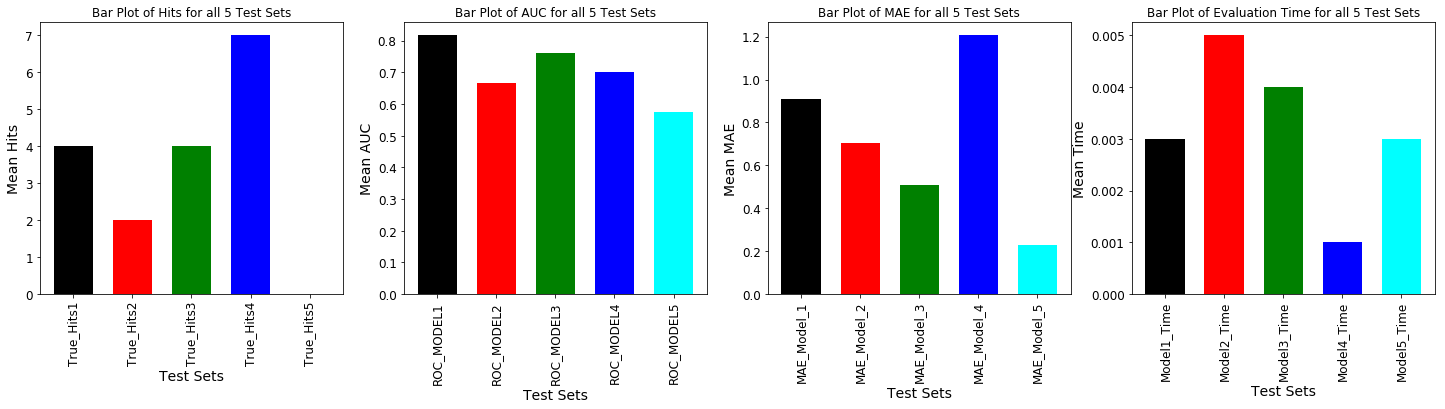

In [677]:
#Random Forest Summary

plt.figure(figsize=(25, 5))


plt.subplot(141)
y_hits = list_of_hits
x_hits = ['True_Hits1' ,'True_Hits2' ,'True_Hits3' ,'True_Hits4','True_Hits5']
plt.xticks(rotation = 'vertical')
width = 1/1.5
plt.bar(x_hits, y_hits, width, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Test Sets')
plt.ylabel('Mean Hits')
plt.title('Bar Plot of Hits for all 5 Test Sets')

plt.subplot(142)
y_hits = list_of_auc
x_hits = ['ROC_MODEL1','ROC_MODEL2','ROC_MODEL3','ROC_MODEL4','ROC_MODEL5']
plt.xticks(rotation = 'vertical')
width = 1/1.5
plt.bar(x_hits, y_hits, width, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Test Sets')
plt.ylabel('Mean AUC')
plt.title('Bar Plot of AUC for all 5 Test Sets')

plt.subplot(143)
y_hits = list_of_mae
x_hits = ['MAE_Model_1','MAE_Model_2','MAE_Model_3','MAE_Model_4','MAE_Model_5']
plt.xticks(rotation = 'vertical')
width = 1/1.5
plt.bar(x_hits, y_hits, width, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Test Sets')
plt.ylabel('Mean MAE')
plt.title('Bar Plot of MAE for all 5 Test Sets')

plt.subplot(144)
y_hits = list_of_eval_time
x_hits = ['Model1_Time','Model2_Time','Model3_Time','Model4_Time','Model5_Time']
plt.xticks(rotation = 'vertical')
width = 1/1.5
plt.bar(x_hits, y_hits, width, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Test Sets')
plt.ylabel('Mean Time')
plt.title('Bar Plot of Evaluation Time for all 5 Test Sets')
plt.show()

# DNN

- Initialization: He Initialization
- Activation Function: SELU
- Normalization: Batch Normalization
- Regularization: Dropout
- Optimizer: Adam
- Learning Rate Schedule: None

Step.1: Build a DNN with 2 hidden layers, He initialization, and the RELU activation function.

In [680]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [694]:
n_inputs = 53
n_hidden1 = 2
n_hidden2 = 2
n_outputs = 1

In [695]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.float32, shape=(None), name="y")

In [696]:
# Implement dropout

training = tf.placeholder_with_default(False, shape=(), name='training')

dropout_rate = 0.5
X_drop = tf.layers.dropout(X, dropout_rate, training=training)

with tf.name_scope("dnn"):
   
    hidden_T1 = tf.layers.dense(X_drop, n_hidden1, name="hiddenLayersT1",
                              activation=tf.nn.relu)
    hidden_T2 = tf.layers.dense(hidden_T1, n_hidden2, name="hiddenLayersT2",
                              activation=tf.nn.relu)
    logit = tf.layers.dense(hidden_T2, n_outputs, name="outputslayersT2")
    
    logits = logit[:, 0]
    

In [697]:
with tf.name_scope("loss"):
    mse = tf.losses.mean_squared_error(labels=y, predictions=logits)
    loss = tf.reduce_mean(mse, name="loss")
    loss_summary = tf.summary.scalar('loss', loss)

In [698]:
learning_rate = 0.0001

with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [742]:
with tf.name_scope("eval"):
    
    # MAE
    mae = tf.reduce_mean(tf.abs(y-logits))
    mae_summary = tf.summary.scalar('mae', mae) # MAE DONE
    
    # HITS
    # First, get top 10 values for labels and logits; this will be used for HITS and AUC
    # Next, find the intersection of indexes for the top 10 values and use this for HITS
    top_10_labels_vals, top_10_labels_index = tf.nn.top_k(y, 10)
    top_10_logits_vals, top_10_logits_index = tf.nn.top_k(logits, 10)
    
    hits = tf.sets.set_intersection(top_10_labels_index, top_10_logits_index[None])
    hits_10 = tf.size(hits)
    hits_summary = tf.summary.scalar('hits_10', hits_10)
    
    #AUC
    label_bool = tf.greater_equal(y, tf.reduce_min(top_10_labels_vals))
    label = tf.cast(label_bool, tf.int32)
    
    predictions_bool = tf.greater_equal(logits, tf.reduce_min(top_10_logits_vals))
    prediction = tf.cast(predictions_bool, tf.int32)
 
    auc, update_op = tf.contrib.metrics.streaming_auc(label, prediction)

In [700]:
init = tf.global_variables_initializer()
init_l = tf.local_variables_initializer()
saver = tf.train.Saver()

Now we need to define the directory to write the TensorBoard logs to:

In [701]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "Machine Learning Capstone Project/tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)


In [702]:
logdir = log_dir("TensorLogs")

Now we can create the FileWriter that we will use to write the TensorBoard logs:

In [703]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [704]:
# Now use the training and test features and Labels.

X_train_1 = Training_Data_1_Features 
X_train_2 = Training_Data_2_Features 
X_train_3 = Training_Data_3_Features 
X_train_4 = Training_Data_4_Features 
X_train_5 = Training_Data_5_Features 

y_train_1 = Training_Data_1_Labels_Flatten
y_train_2 = Training_Data_2_Labels_Flatten
y_train_3 = Training_Data_3_Labels_Flatten
y_train_4 = Training_Data_4_Labels_Flatten
y_train_5 = Training_Data_5_Labels_Flatten

X_test_set_1 = Test_Data_1_Features
X_test_set_2 = Test_Data_2_Features
X_test_set_3 = Test_Data_3_Features
X_test_set_4 = Test_Data_4_Features
X_test_set_5 = Test_Data_5_Features

y_test_set_1 = Test_Data_1_Labels_Flatten
y_test_set_2 = Test_Data_2_Labels_Flatten
y_test_set_3 = Test_Data_3_Labels_Flatten
y_test_set_4 = Test_Data_4_Labels_Flatten
y_test_set_5 = Test_Data_5_Labels_Flatten

In [705]:
m_1, n_1 = X_train_1.shape
m_2, n_2 = X_train_2.shape
m_3, n_3 = X_train_3.shape
m_4, n_4 = X_train_4.shape
m_5, n_5 = X_train_5.shape

In [706]:
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

##### First we construct all 5 Models and further we will compute HITS@10, AUC, MAC and Processing Time

In [748]:
#Run the first model on the training set.

n_epochs = 50
batch_size = 25
n_batches = int(np.ceil(m_1 / batch_size))
start_epoch = 0
#n_batches = 5

checkpoint_path_1 = "Machine Learning Capstone Project/tmp/1_train_dnn_reg_model.ckpt"
checkpoint_epoch_path_1 = checkpoint_path_1 + ".epoch"
final_model_path_1 = "Machine Learning Capstone Project/1_train_dnn_reg_model"
StartTime = time.time()

with tf.Session() as sess_1:
    if os.path.isfile(checkpoint_epoch_path_1):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path_1, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess_1, checkpoint_path_1)
    else:
        start_epoch = 0
        sess_1.run(init)
        sess_1.run(init_l)
        for epoch in range(start_epoch, n_epochs):
            for iteration in range(int(np.ceil(len(X_train_1) // batch_size))):
                X_batch_1, y_batch_1 = random_batch(X_train_1, y_train_1, batch_size)
                sess_1.run(training_op, feed_dict={X: X_batch_1, y: y_batch_1})          
            
            loss_val, summary_str = sess_1.run([loss, loss_summary], feed_dict = {X : X_test_set_1, y : y_test_set_1})
            file_writer.add_summary(summary_str, epoch)
            if epoch % 2 == 0:
                print("Epoch:", epoch, "\tLoss:", loss_val)
                saver.save(sess_1, checkpoint_path_1)
                with open(checkpoint_epoch_path_1, "wb") as f:
                    f.write(b"%d" % (epoch + 1))
    
    saver.save(sess_1, final_model_path_1)      
EndTime = time.time()

Epoch: 0 	Loss: 6.009687
Epoch: 2 	Loss: 5.8673873
Epoch: 4 	Loss: 5.763513
Epoch: 6 	Loss: 5.6557813
Epoch: 8 	Loss: 5.5469604
Epoch: 10 	Loss: 5.4559264
Epoch: 12 	Loss: 5.3795624
Epoch: 14 	Loss: 5.3009987
Epoch: 16 	Loss: 5.2168055
Epoch: 18 	Loss: 5.1372375
Epoch: 20 	Loss: 5.0573425
Epoch: 22 	Loss: 5.003282
Epoch: 24 	Loss: 4.9149065
Epoch: 26 	Loss: 4.8448267
Epoch: 28 	Loss: 4.786586
Epoch: 30 	Loss: 4.732807
Epoch: 32 	Loss: 4.6920323
Epoch: 34 	Loss: 4.6427937
Epoch: 36 	Loss: 4.593965
Epoch: 38 	Loss: 4.5674763
Epoch: 40 	Loss: 4.4890947
Epoch: 42 	Loss: 4.496712
Epoch: 44 	Loss: 4.442803
Epoch: 46 	Loss: 4.459839
Epoch: 48 	Loss: 4.417677


In [756]:
with tf.Session() as sess_1:
    if os.path.isfile(checkpoint_epoch_path_1):
        os.remove(checkpoint_epoch_path_1)

In [755]:
#Processing Time for 1st Model

Time_Model_1 = round(EndTime-StartTime, 4) 

In [757]:
#Run the Second model on the training set.
#reset epoch to 1

n_epochs = 50
start_epoch = 0
batch_size = 25
n_batches = int(np.ceil(m_2 / batch_size))
#n_batches = 5

checkpoint_path_2 = "Machine Learning Capstone Project/tmp/2_train_dnn_reg_model.ckpt"
checkpoint_epoch_path_2 = checkpoint_path_2 + ".epoch"
final_model_path_2 = "Machine Learning Capstone Project/2_train_dnn_reg_model"

StartTime = time.time()

with tf.Session() as sess_2:
    if os.path.isfile(checkpoint_epoch_path_2):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path_2, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess_2, checkpoint_path_2)
    else:
        start_epoch = 0
        sess_2.run(init)
        sess_2.run(init_l)
        for epoch in range(start_epoch, n_epochs):
            for iteration in range(int(np.ceil(len(X_train_2) // batch_size))):
                X_batch_2, y_batch_2 = random_batch(X_train_2, y_train_2, batch_size)
                sess_2.run(training_op, feed_dict={X: X_batch_2, y: y_batch_2})          
            
            loss_val, summary_str = sess_2.run([loss, loss_summary], feed_dict = {X : X_test_set_2, y : y_test_set_2})
            file_writer.add_summary(summary_str, epoch)
            if epoch % 2 == 0:
                print("Epoch:", epoch, "\tLoss:", loss_val)
                saver.save(sess_2, checkpoint_path_2)
                with open(checkpoint_epoch_path_2, "wb") as f:
                    f.write(b"%d" % (epoch + 1))
    
    saver.save(sess_2, final_model_path_2)   
EndTime = time.time()

Epoch: 0 	Loss: 5.808504
Epoch: 2 	Loss: 5.6479864
Epoch: 4 	Loss: 5.520434
Epoch: 6 	Loss: 5.415953
Epoch: 8 	Loss: 5.2948112
Epoch: 10 	Loss: 5.1572747
Epoch: 12 	Loss: 5.038416
Epoch: 14 	Loss: 4.939325
Epoch: 16 	Loss: 4.8844976
Epoch: 18 	Loss: 4.8226967
Epoch: 20 	Loss: 4.776817
Epoch: 22 	Loss: 4.7666445
Epoch: 24 	Loss: 4.6379333
Epoch: 26 	Loss: 4.6113853
Epoch: 28 	Loss: 4.6368275
Epoch: 30 	Loss: 4.4628925
Epoch: 32 	Loss: 4.431202
Epoch: 34 	Loss: 4.4332685
Epoch: 36 	Loss: 4.4195347
Epoch: 38 	Loss: 4.297818
Epoch: 40 	Loss: 4.403634
Epoch: 42 	Loss: 4.22228
Epoch: 44 	Loss: 4.341417
Epoch: 46 	Loss: 4.198443
Epoch: 48 	Loss: 4.3289757


In [758]:
with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path_2):
        os.remove(checkpoint_epoch_path_2)

In [759]:
Time_Model_2 = round(EndTime-StartTime, 4)

In [760]:
#Run the third model on the training set.

n_epochs = 50
start_epoch = 0
batch_size = 25
n_batches = int(np.ceil(m_3 / batch_size))
#n_batches = 5

checkpoint_path_3 = "Machine Learning Capstone Project/tmp/3_train_dnn_reg_model.ckpt"
checkpoint_epoch_path_3 = checkpoint_path_3 + ".epoch"
final_model_path_3 = "Machine Learning Capstone Project/3_train_dnn_reg_model"

StartTime = time.time()

with tf.Session() as sess_3:
    if os.path.isfile(checkpoint_epoch_path_3):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path_3, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess_3, checkpoint_path_3)
    else:
        start_epoch = 0
        sess_3.run(init)
        sess_3.run(init_l)
        for epoch in range(start_epoch, n_epochs):
            for iteration in range(int(np.ceil(len(X_train_3) // batch_size))):
                X_batch_3, y_batch_3 = random_batch(X_train_3, y_train_3, batch_size)
                sess_3.run(training_op, feed_dict={X: X_batch_3, y: y_batch_3})          
            
            loss_val, summary_str = sess_3.run([loss, loss_summary], feed_dict = {X : X_test_set_3, y : y_test_set_3})
            file_writer.add_summary(summary_str, epoch)
            if epoch % 2 == 0:
                print("Epoch:", epoch, "\tLoss:", loss_val)
                saver.save(sess_3, checkpoint_path_3)
                with open(checkpoint_epoch_path_3, "wb") as f:
                    f.write(b"%d" % (epoch + 1))
    
    saver.save(sess_3, final_model_path_3)  
EndTime = time.time()

Epoch: 0 	Loss: 1.8207916
Epoch: 2 	Loss: 1.692906
Epoch: 4 	Loss: 1.6297634
Epoch: 6 	Loss: 1.5578772
Epoch: 8 	Loss: 1.51552
Epoch: 10 	Loss: 1.4716648
Epoch: 12 	Loss: 1.4518063
Epoch: 14 	Loss: 1.4532857
Epoch: 16 	Loss: 1.406571
Epoch: 18 	Loss: 1.4269931
Epoch: 20 	Loss: 1.3929126
Epoch: 22 	Loss: 1.4891222
Epoch: 24 	Loss: 1.4036527
Epoch: 26 	Loss: 1.4880481
Epoch: 28 	Loss: 1.5132484
Epoch: 30 	Loss: 1.4772747
Epoch: 32 	Loss: 1.5019193
Epoch: 34 	Loss: 1.52533
Epoch: 36 	Loss: 1.3969017
Epoch: 38 	Loss: 1.3973413
Epoch: 40 	Loss: 1.2981726
Epoch: 42 	Loss: 1.270164
Epoch: 44 	Loss: 1.3028299
Epoch: 46 	Loss: 1.3206275
Epoch: 48 	Loss: 1.3259146


In [761]:
with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path_3):
        os.remove(checkpoint_epoch_path_3)

In [762]:
Time_Model_3 = round(EndTime-StartTime, 4)

In [763]:
#Run the Fourth model on the training set.

n_epochs = 50
start_epoch = 0
batch_size = 25
n_batches = int(np.ceil(m_4 / batch_size))
#n_batches = 5

checkpoint_path_4 = "Machine Learning Capstone Project/tmp/4_train_dnn_reg_model.ckpt"
checkpoint_epoch_path_4 = checkpoint_path_4 + ".epoch"
final_model_path_4 = "Machine Learning Capstone Project/4_train_dnn_reg_model"

StartTime = time.time()

with tf.Session() as sess_4:
    if os.path.isfile(checkpoint_epoch_path_4):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path_4, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess_4, checkpoint_path_4)
    else:
        start_epoch = 0
        sess_4.run(init)
        sess_4.run(init_l)
        for epoch in range(start_epoch, n_epochs):
            for iteration in range(int(np.ceil(len(X_train_4) // batch_size))):
                X_batch_4, y_batch_4 = random_batch(X_train_4, y_train_4, batch_size)
                sess_4.run(training_op, feed_dict={X: X_batch_4, y: y_batch_4})          
            
            loss_val, summary_str = sess_4.run([loss, loss_summary], feed_dict = {X : X_test_set_4, y : y_test_set_4})
            file_writer.add_summary(summary_str, epoch)
            if epoch % 2 == 0:
                print("Epoch:", epoch, "\tLoss:", loss_val)
                saver.save(sess_4, checkpoint_path_4)
                with open(checkpoint_epoch_path_4, "wb") as f:
                    f.write(b"%d" % (epoch + 1))
    
    saver.save(sess_4, final_model_path_4)  
EndTime = time.time()

Epoch: 0 	Loss: 15.7746525
Epoch: 2 	Loss: 15.216796
Epoch: 4 	Loss: 14.786373
Epoch: 6 	Loss: 14.471953
Epoch: 8 	Loss: 14.19552
Epoch: 10 	Loss: 13.978713
Epoch: 12 	Loss: 13.777649
Epoch: 14 	Loss: 13.567004
Epoch: 16 	Loss: 13.338984
Epoch: 18 	Loss: 13.121774
Epoch: 20 	Loss: 12.916812
Epoch: 22 	Loss: 12.770027
Epoch: 24 	Loss: 12.670589
Epoch: 26 	Loss: 12.535556
Epoch: 28 	Loss: 12.396753
Epoch: 30 	Loss: 12.2529955
Epoch: 32 	Loss: 12.1780815
Epoch: 34 	Loss: 12.088739
Epoch: 36 	Loss: 12.039342
Epoch: 38 	Loss: 11.903862
Epoch: 40 	Loss: 11.879331
Epoch: 42 	Loss: 12.554613
Epoch: 44 	Loss: 12.113119
Epoch: 46 	Loss: 12.121243
Epoch: 48 	Loss: 12.736547


In [764]:
with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path_4):
        os.remove(checkpoint_epoch_path_4)

In [765]:
Time_Model_4 = round(EndTime-StartTime, 4)

In [766]:
#Run the Fifth model on the training set.
start_epoch = 0
n_epochs = 50
batch_size = 25
n_batches = int(np.ceil(m_5 / batch_size))
#n_batches = 5

checkpoint_path_5 = "Machine Learning Capstone Project/tmp/5_train_dnn_reg_model.ckpt"
checkpoint_epoch_path_5 = checkpoint_path_5 + ".epoch"
final_model_path_5 = "Machine Learning Capstone Project/5_train_dnn_reg_model"

StartTime = time.time()
with tf.Session() as sess_5:
    if os.path.isfile(checkpoint_epoch_path_5):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path_5, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess_5, checkpoint_path_5)
    else:
        start_epoch = 0
        sess_5.run(init)
        sess_5.run(init_l)
        for epoch in range(start_epoch, n_epochs):
            for iteration in range(int(np.ceil(len(X_train_5) // batch_size))):
                X_batch_5, y_batch_5 = random_batch(X_train_5, y_train_5, batch_size)
                sess_5.run(training_op, feed_dict={X: X_batch_5, y: y_batch_5})          
            
            loss_val, summary_str = sess_5.run([loss, loss_summary], feed_dict = {X : X_test_set_5, y : y_test_set_5})
            file_writer.add_summary(summary_str, epoch)
            if epoch % 2 == 0:
                print("Epoch:", epoch, "\tLoss:", loss_val)
                saver.save(sess_5, checkpoint_path_5)
                with open(checkpoint_epoch_path_5, "wb") as f:
                    f.write(b"%d" % (epoch + 1))
    
    saver.save(sess_5, final_model_path_5)      
EndTime = time.time()

Epoch: 0 	Loss: 15.934275
Epoch: 2 	Loss: 15.618091
Epoch: 4 	Loss: 15.969795
Epoch: 6 	Loss: 16.191633
Epoch: 8 	Loss: 16.355453
Epoch: 10 	Loss: 16.449774
Epoch: 12 	Loss: 16.439255
Epoch: 14 	Loss: 16.579393
Epoch: 16 	Loss: 16.617498
Epoch: 18 	Loss: 16.775131
Epoch: 20 	Loss: 16.7786
Epoch: 22 	Loss: 16.889427
Epoch: 24 	Loss: 17.015434
Epoch: 26 	Loss: 17.002493
Epoch: 28 	Loss: 17.123163
Epoch: 30 	Loss: 16.835007
Epoch: 32 	Loss: 17.072754
Epoch: 34 	Loss: 17.117546
Epoch: 36 	Loss: 17.275518
Epoch: 38 	Loss: 17.276669
Epoch: 40 	Loss: 16.82499
Epoch: 42 	Loss: 17.411573
Epoch: 44 	Loss: 17.125908
Epoch: 46 	Loss: 17.276062
Epoch: 48 	Loss: 17.337252


In [767]:
with tf.Session() as sess_5:
    if os.path.isfile(checkpoint_epoch_path_5):
        os.remove(checkpoint_epoch_path_5)

In [768]:
Time_Model_5 = round(EndTime-StartTime, 4)

##### Now We can see the results of All the 5 Tensor Flow Models 

In [769]:
#MAE Test Set1
with tf.Session() as sess_1:
    saver.restore(sess_1, final_model_path_1)
    mae_val_1 = mae.eval(feed_dict={X : X_test_set_1, y : y_test_set_1})

#MAE Test Set2
with tf.Session() as sess_2:
    saver.restore(sess_2, final_model_path_2)
    mae_val_2 = mae.eval(feed_dict={X : X_test_set_2, y : y_test_set_2})

#MAE Test Set3
with tf.Session() as sess_3:
    saver.restore(sess_3, final_model_path_3)
    mae_val_3 = mae.eval(feed_dict={X : X_test_set_3, y : y_test_set_3})

#MAE Test Set4
with tf.Session() as sess_4:
    saver.restore(sess_4, final_model_path_4)
    mae_val_4 = mae.eval(feed_dict={X : X_test_set_4, y : y_test_set_4})
    
#MAE Test Set2
with tf.Session() as sess_5:
    saver.restore(sess_5, final_model_path_5)
    mae_val_5 = mae.eval(feed_dict={X : X_test_set_5, y : y_test_set_5})

INFO:tensorflow:Restoring parameters from Machine Learning Capstone Project/1_train_dnn_reg_model
INFO:tensorflow:Restoring parameters from Machine Learning Capstone Project/2_train_dnn_reg_model
INFO:tensorflow:Restoring parameters from Machine Learning Capstone Project/3_train_dnn_reg_model
INFO:tensorflow:Restoring parameters from Machine Learning Capstone Project/4_train_dnn_reg_model
INFO:tensorflow:Restoring parameters from Machine Learning Capstone Project/5_train_dnn_reg_model


In [770]:
print("The Mean Absolute error for the first model is", mae_val_1)
print("The Mean Absolute error for the second model is", mae_val_2)
print("The Mean Absolute error for the Third model is", mae_val_3)
print("The Mean Absolute error for the fourth model is", mae_val_4)
print("The Mean Absolute error for the fifth model is", mae_val_5)

The Mean Absolute error for the first model is 0.71002024
The Mean Absolute error for the second model is 0.67541766
The Mean Absolute error for the Third model is 0.46468568
The Mean Absolute error for the fourth model is 0.93327
The Mean Absolute error for the fifth model is 1.4233453


In [771]:
# HITS@10 test_set_1
with tf.Session() as sess_1:
    saver.restore(sess_1, final_model_path_1)
    hits_val_1 = hits_10.eval(feed_dict={X : X_test_set_1, y : y_test_set_1[None]})

with tf.Session() as sess_2:
    saver.restore(sess_2, final_model_path_2)
    hits_val_2 = hits_10.eval(feed_dict={X : X_test_set_2, y : y_test_set_2[None]})
    
with tf.Session() as sess_3:
    saver.restore(sess_3, final_model_path_3)
    hits_val_3 = hits_10.eval(feed_dict={X : X_test_set_3, y : y_test_set_3[None]})
    
with tf.Session() as sess_4:
    saver.restore(sess_4, final_model_path_4)
    hits_val_4 = hits_10.eval(feed_dict={X : X_test_set_4, y : y_test_set_4[None]})
    
with tf.Session() as sess_5:
    saver.restore(sess_5, final_model_path_5)
    hits_val_5 = hits_10.eval(feed_dict={X : X_test_set_5, y : y_test_set_5[None]})

INFO:tensorflow:Restoring parameters from Machine Learning Capstone Project/1_train_dnn_reg_model
INFO:tensorflow:Restoring parameters from Machine Learning Capstone Project/2_train_dnn_reg_model
INFO:tensorflow:Restoring parameters from Machine Learning Capstone Project/3_train_dnn_reg_model
INFO:tensorflow:Restoring parameters from Machine Learning Capstone Project/4_train_dnn_reg_model
INFO:tensorflow:Restoring parameters from Machine Learning Capstone Project/5_train_dnn_reg_model


In [772]:
print("The Hits 10 value for the first model is", hits_val_1)
print("The Hits 10 value for the second model is", hits_val_2)
print("The Hits 10 value for the third model is", hits_val_3)
print("The Hits 10 value for the fourth model is", hits_val_4)
print("The Hits 10 value for the fifth model is", hits_val_5)

The Hits 10 value for the first model is 7
The Hits 10 value for the second model is 5
The Hits 10 value for the third model is 6
The Hits 10 value for the fourth model is 6
The Hits 10 value for the fifth model is 1


In [773]:
with tf.Session() as sess_1:
    sess_1.run(tf.local_variables_initializer())
    saver.restore(sess_1, final_model_path_1)
    update_op_val = update_op.eval(feed_dict={X : X_test_set_1, y : y_test_set_1})
    auc_val_1 = auc.eval(feed_dict={X : X_test_set_1, y : y_test_set_1})
    
with tf.Session() as sess_2:
    sess_2.run(tf.local_variables_initializer())
    saver.restore(sess_2, final_model_path_2)
    update_op_val = update_op.eval(feed_dict={X : X_test_set_2, y : y_test_set_2})
    auc_val_2 = auc.eval(feed_dict={X : X_test_set_2, y : y_test_set_2})
    
with tf.Session() as sess_3:
    sess_3.run(tf.local_variables_initializer())
    saver.restore(sess_3, final_model_path_3)
    update_op_val = update_op.eval(feed_dict={X : X_test_set_3, y : y_test_set_3})
    auc_val_3 = auc.eval(feed_dict={X : X_test_set_3, y : y_test_set_3})
    
with tf.Session() as sess_4:
    sess_4.run(tf.local_variables_initializer())
    saver.restore(sess_4, final_model_path_4)
    update_op_val = update_op.eval(feed_dict={X : X_test_set_4, y : y_test_set_4})
    auc_val_4 = auc.eval(feed_dict={X : X_test_set_4, y : y_test_set_4})
    
with tf.Session() as sess_5:
    sess_5.run(tf.local_variables_initializer())
    saver.restore(sess_5, final_model_path_5)
    update_op_val = update_op.eval(feed_dict={X : X_test_set_5, y : y_test_set_5})
    auc_val_5 = auc.eval(feed_dict={X : X_test_set_5, y : y_test_set_5})

INFO:tensorflow:Restoring parameters from Machine Learning Capstone Project/1_train_dnn_reg_model
INFO:tensorflow:Restoring parameters from Machine Learning Capstone Project/2_train_dnn_reg_model
INFO:tensorflow:Restoring parameters from Machine Learning Capstone Project/3_train_dnn_reg_model
INFO:tensorflow:Restoring parameters from Machine Learning Capstone Project/4_train_dnn_reg_model
INFO:tensorflow:Restoring parameters from Machine Learning Capstone Project/5_train_dnn_reg_model


In [774]:
print("The AUC value for the first model is", auc_val_1)
print("The AUC value for the second model is", auc_val_2)
print("The AUC value for the third model is", auc_val_3)
print("The AUC value for the fourth model is", auc_val_4)
print("The AUC value for the fifth model is", auc_val_5)

The AUC value for the first model is 0.8333333
The AUC value for the second model is 0.7222222
The AUC value for the third model is 0.7777778
The AUC value for the fourth model is 0.7777778
The AUC value for the fifth model is 0.50000006


In [777]:
#Get the Processing Times

print("The Processing Time for the first model is",Time_Model_1,"seconds")
print("The Processing Time for the second model is",Time_Model_2,"seconds")
print("The Processing Time for the Third model is",Time_Model_3,"seconds")
print("The Processing Time for the fourth model is", Time_Model_4,"seconds")
print("The Processing Time for the fifth model is", Time_Model_5,"seconds")

The Processing Time for the first model is 74.4496 seconds
The Processing Time for the second model is 133.2392 seconds
The Processing Time for the Third model is 190.0413 seconds
The Processing Time for the fourth model is 249.0824 seconds
The Processing Time for the fifth model is 336.3496 seconds


In [780]:
#List for Neural Networks
list_of_hits = [hits_val_1, hits_val_2, hits_val_3,hits_val_4,hits_val_5]
list_of_auc = [auc_val_1,auc_val_2,auc_val_3,auc_val_4,auc_val_5]
list_of_mae = [mae_val_1,mae_val_2,mae_val_3,mae_val_4,mae_val_5]
list_of_eval_time = [Time_Model_1,Time_Model_2,Time_Model_3,Time_Model_4,Time_Model_5]

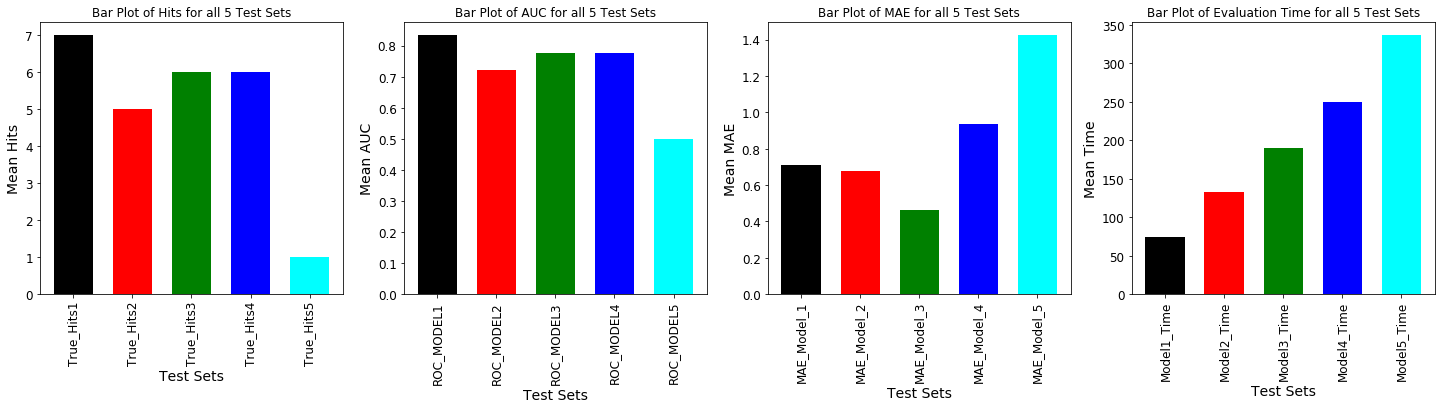

In [781]:
#Plots for Neural Networks

plt.figure(figsize=(25, 5))


plt.subplot(141)
y_hits = list_of_hits
x_hits = ['True_Hits1' ,'True_Hits2' ,'True_Hits3' ,'True_Hits4','True_Hits5']
plt.xticks(rotation = 'vertical')
width = 1/1.5
plt.bar(x_hits, y_hits, width, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Test Sets')
plt.ylabel('Mean Hits')
plt.title('Bar Plot of Hits for all 5 Test Sets')

plt.subplot(142)
y_hits = list_of_auc
x_hits = ['ROC_MODEL1','ROC_MODEL2','ROC_MODEL3','ROC_MODEL4','ROC_MODEL5']
plt.xticks(rotation = 'vertical')
width = 1/1.5
plt.bar(x_hits, y_hits, width, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Test Sets')
plt.ylabel('Mean AUC')
plt.title('Bar Plot of AUC for all 5 Test Sets')

plt.subplot(143)
y_hits = list_of_mae
x_hits = ['MAE_Model_1','MAE_Model_2','MAE_Model_3','MAE_Model_4','MAE_Model_5']
plt.xticks(rotation = 'vertical')
width = 1/1.5
plt.bar(x_hits, y_hits, width, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Test Sets')
plt.ylabel('Mean MAE')
plt.title('Bar Plot of MAE for all 5 Test Sets')

plt.subplot(144)
y_hits = list_of_eval_time
x_hits = ['Model1_Time','Model2_Time','Model3_Time','Model4_Time','Model5_Time']
plt.xticks(rotation = 'vertical')
width = 1/1.5
plt.bar(x_hits, y_hits, width, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Test Sets')
plt.ylabel('Mean Time')
plt.title('Bar Plot of Evaluation Time for all 5 Test Sets')
plt.show()

### SUMMARY


- Based on the Number of Hits, Nueral Networks performs better than Random Forest.
  <pre>
  - Random Forest   = [4, 2, 4, 7, 0]
  - Neural Networks = [7, 5, 6, 6, 1]
  </pre>
  
- The Area under the curve is better for the Neural Network for the first 4 Models. But it decreases for 5th Model
  <pre>
  - Random Forest    = [0.8166666, 0.6666666, 0.7611111, 0.7000002, 0.57507660]
  - Neural Networks  = [0.8333333, 0.7222222, 0.7777778, 0.7777778, 0.50000006]
  </pre>
  
- The Mean Absolute Error is better for the Neural Networks (Lesser) for the first model. But it increases for the 5th Model
  <pre>
  - Random Forest    = [0.91120835, 0.70293223, 0.50684041, 1.20622, 0.2282738]
  - Neural Networks  = [0.71002024, 0.67541766, 0.46468568, 0.93327, 1.4233453]
  </pre>
  
- With the Number of Input and Hidden Layers, Processing Time increases for Neural Networks, when compared to Random Forest 
   <pre>
  - Random Forest    = [0.003, 0.005, 0.004, 0.001, 0.003]
  - Neural Networks  = [74.4496, 133.2392, 190.0413, 249.0824, 336.3496]
  </pre>

### CONCLUSION

Based on the results above, Nueral Networks is a better model than Random Forest. Thus my findings doesn't supports the conclusions of the research paper.